<a href="https://colab.research.google.com/github/olvsegun/fantasy_premier_league/blob/main/FPL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime, date

In [ ]:
# fpl api url

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

# make a GET request

response = requests.get(url)
response.status_code

200

In [ ]:
# transform into a json object
response = response.json()


In [ ]:
# view the keys
response.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
# explore keys and load relevant keys in dataframes


teams = pd.DataFrame(response['teams'])
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1240,1250,1160,1210,1190,1230,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1150,1140,1170,1120,1160,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,3,None,False,0,1100,1120,1110,1130,1100,1120,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,3,None,False,0,1060,1100,1130,1150,1010,1020,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,4,None,False,0,1250,1280,1180,1250,1230,1260,4


In [ ]:
elements = pd.DataFrame(response['elements'])
print(elements.shape)
elements.head()

(597, 67)


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-2,2,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,68,37605.jpg,0.0,Özil,0.6,False,None,n,1,3,0,3285,19,48390,966,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,595,237,596,237,596,237,596,237,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-1,1,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-21T10:30:18.546407Z,49,39476.jpg,0.0,Papastathopoulos,0.1,False,None,n,1,3,0,10200,5,17942,185,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,542,205,535,205,521,197,547,205,NaN,,NaN,,NaN,
2,50.0,50.0,41270,0,0,0,0,0,2,0.8,0.5,0,David,1.0,3,False,Thigh injury - 50% chance of playing,2020-10-25T21:30:13.186040Z,55,41270.jpg,1.4,Luiz Moreira Marinho,0.9,False,None,d,1,3,7,29662,148,63034,4694,0.2,1.3,David Luiz,319,0,0,0,5,0,0,0,0,0,0,0,51,66.6,9.8,21.0,9.7,187,79,295,93,222,64,246,82,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-3,3,0,3,4.5,4.0,8,Pierre-Emerick,4.0,4,False,,2020-10-08T09:00:12.305506Z,117,54694.jpg,4.0,Aubameyang,13.7,False,None,a,1,3,28,371945,17179,2552905,24339,0.3,2.4,Aubameyang,626,2,1,2,7,0,0,0,2,0,0,1,104,127.4,119.5,143.0,39.0,71,26,39,30,41,22,39,22,NaN,,6.0,,1.0,
4,100.0,100.0,58822,0,0,-3,3,0,2,0.5,0.0,0,Cédric,0.0,5,False,,2020-09-23T09:00:14.881983Z,47,58822.jpg,0.0,Soares,0.2,False,None,a,1,3,0,2718,140,30262,429,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,520,198,510,198,488,188,525,198,NaN,,NaN,,NaN,


In [ ]:
elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [ ]:
feature_cols = ['second_name', 'dreamteam_count', 'element_type', 'form',
                'now_cost', 'points_per_game', 'selected_by_percent', 'team',
                'transfers_in','value_season', 'goals_scored', 'bonus', 'total_points'
                ]

In [ ]:
new_elements = elements[feature_cols].copy()
new_elements.head()

,second_name,dreamteam_count,element_type,form,now_cost,points_per_game,selected_by_percent,team,transfers_in,value_season,goals_scored,bonus,total_points
0,Özil,0,3,0.0,68,0.0,0.6,1,3285,0.0,0,0,0
1,Papastathopoulos,0,2,0.0,49,0.0,0.1,1,10200,0.0,0,0,0
2,Luiz Moreira Marinho,0,2,1.0,55,1.4,0.9,1,29662,1.3,0,0,7
3,Aubameyang,0,3,4.0,117,4.0,13.7,1,371945,2.4,2,1,28
4,Soares,0,2,0.0,47,0.0,0.2,1,2718,0.0,0,0,0


In [ ]:
element_stats = pd.DataFrame(response['element_stats'])
print(element_stats.shape)
element_stats.head()

(17, 2)


,label,name
0,Minutes played,minutes
1,Goals scored,goals_scored
2,Assists,assists
3,Clean sheets,clean_sheets
4,Goals conceded,goals_conceded


In [ ]:
element_types = pd.DataFrame(response['element_types'])
print(element_types.shape)
element_types.head()

(4, 11)


,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],68
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],216
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],237
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],76


In [ ]:
# merge element type id to name or use map
new_elements['Position'] = new_elements['element_type'].map(element_types.set_index('id')['singular_name'])
new_elements.head()

,second_name,dreamteam_count,element_type,form,now_cost,points_per_game,selected_by_percent,team,transfers_in,value_season,goals_scored,bonus,total_points,Position
0,Özil,0,3,0.0,68,0.0,0.6,1,3285,0.0,0,0,0,Midfielder
1,Papastathopoulos,0,2,0.0,49,0.0,0.1,1,10200,0.0,0,0,0,Defender
2,Luiz Moreira Marinho,0,2,1.0,55,1.4,0.9,1,29662,1.3,0,0,7,Defender
3,Aubameyang,0,3,4.0,117,4.0,13.7,1,371945,2.4,2,1,28,Midfielder
4,Soares,0,2,0.0,47,0.0,0.2,1,2718,0.0,0,0,0,Defender


In [ ]:
# do the same to team
new_elements['team'] = new_elements['team'].map(teams.set_index('id')['name'])
new_elements.head()

,second_name,dreamteam_count,element_type,form,now_cost,points_per_game,selected_by_percent,team,transfers_in,value_season,goals_scored,bonus,total_points,Position
0,Özil,0,3,0.0,68,0.0,0.6,Arsenal,3285,0.0,0,0,0,Midfielder
1,Papastathopoulos,0,2,0.0,49,0.0,0.1,Arsenal,10200,0.0,0,0,0,Defender
2,Luiz Moreira Marinho,0,2,1.0,55,1.4,0.9,Arsenal,29662,1.3,0,0,7,Defender
3,Aubameyang,0,3,4.0,117,4.0,13.7,Arsenal,371945,2.4,2,1,28,Midfielder
4,Soares,0,2,0.0,47,0.0,0.2,Arsenal,2718,0.0,0,0,0,Defender


In [ ]:
# we can now drop the element type but first we need to check if all element type has been accounted for
new_elements.element_type.nunique(), new_elements.Position.nunique()

(4, 4)

In [ ]:
# Drop element type
new_elements.drop(columns='element_type', inplace=True)

In [ ]:
# clean our data a bit 
new_elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   second_name          597 non-null    object
 1   dreamteam_count      597 non-null    int64 
 2   form                 597 non-null    object
 3   now_cost             597 non-null    int64 
 4   points_per_game      597 non-null    object
 5   selected_by_percent  597 non-null    object
 6   team                 597 non-null    object
 7   transfers_in         597 non-null    int64 
 8   value_season         597 non-null    object
 9   goals_scored         597 non-null    int64 
 10  bonus                597 non-null    int64 
 11  total_points         597 non-null    int64 
 12  Position             597 non-null    object
dtypes: int64(6), object(7)
memory usage: 60.8+ KB


In [ ]:
cols_to_float = ['form', 'points_per_game', 'selected_by_percent', 'value_season']
for col in cols_to_float:
    new_elements[col] = new_elements[col].astype('float')

In [ ]:
new_elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second_name          597 non-null    object 
 1   dreamteam_count      597 non-null    int64  
 2   form                 597 non-null    float64
 3   now_cost             597 non-null    int64  
 4   points_per_game      597 non-null    float64
 5   selected_by_percent  597 non-null    float64
 6   team                 597 non-null    object 
 7   transfers_in         597 non-null    int64  
 8   value_season         597 non-null    float64
 9   goals_scored         597 non-null    int64  
 10  bonus                597 non-null    int64  
 11  total_points         597 non-null    int64  
 12  Position             597 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 60.8+ KB


In [ ]:
new_elements.sort_values(by='value_season', ascending=False).head(10)


,second_name,dreamteam_count,form,now_cost,points_per_game,selected_by_percent,team,transfers_in,value_season,goals_scored,bonus,total_points,Position
132,Zouma,3,8.0,52,7.7,11.3,Chelsea,794832,8.8,3,6,46,Defender
283,Bamford,1,7.0,60,7.3,32.2,Leeds,2493657,8.5,6,8,51,Forward
424,Wilson,1,6.3,65,7.6,13.9,Newcastle,1112350,8.2,6,10,53,Forward
487,Son,4,11.0,96,10.1,59.2,Spurs,4281972,7.4,8,10,71,Midfielder
462,Vestergaard,0,6.7,46,5.7,4.4,Southampton,291724,7.4,2,1,34,Defender
43,Grealish,2,10.8,73,9.0,30.4,Aston Villa,1922670,7.4,4,5,54,Midfielder
574,Saïss,1,4.7,53,6.3,21.6,Wolves,1634099,7.2,1,7,38,Defender
33,Martínez,0,3.8,48,5.7,26.7,Aston Villa,1669631,7.1,0,4,34,Goalkeeper
47,Mings,2,3.5,52,6.0,10.4,Aston Villa,725173,6.9,2,3,36,Defender
463,Ward-Prowse,2,10.0,59,5.7,4.3,Southampton,211741,6.8,3,6,40,Midfielder


In [ ]:
response['game_settings']

{'cup_qualifying_method': 'event',
 'cup_start_event_id': 17,
 'cup_stop_event_id': 38,
 'cup_type': 'random',
 'league_h2h_tiebreak_stats': ['+goals_scored', '-goals_conceded'],
 'league_join_private_max': 25,
 'league_join_public_max': 5,
 'league_ko_first_instead_of_random': False,
 'league_max_ko_rounds_private_h2h': 3,
 'league_max_size_private_h2h': 16,
 'league_max_size_public_classic': 20,
 'league_max_size_public_h2h': 16,
 'league_points_h2h_draw': 1,
 'league_points_h2h_lose': 0,
 'league_points_h2h_win': 3,
 'league_prefix_public': 'League',
 'squad_squadplay': 11,
 'squad_squadsize': 15,
 'squad_team_limit': 3,
 'squad_total_spend': 1000,
 'stats_form_days': 30,
 'sys_vice_captain_enabled': True,
 'timezone': 'UTC',
 'transfers_cap': 1000,
 'transfers_sell_on_fee': 0.5,
 'ui_currency_multiplier': 10,
 'ui_special_shirt_exclusions': [],
 'ui_use_special_shirts': False}

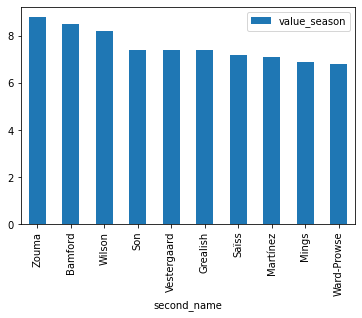

In [ ]:
new_elements.sort_values(by='value_season', ascending=False).head(10).plot(kind='bar', x='second_name', y='value_season')

In [ ]:
new_elements.groupby('team')[['value_season']].sum().sort_values(by='value_season', ascending=False)

,value_season
team,
Wolves,65.9
Southampton,63.9
Aston Villa,61.8
Chelsea,61.6
Leeds,59.6
West Ham,57.5
Leicester,56.3
Arsenal,52.9
Newcastle,51.6


In [ ]:
today = datetime.now()
ts = pd.to_datetime(today)

In [ ]:
ts

Timestamp('2020-11-03 13:32:00.890120')

In [ ]:
new_elements.to_csv(f"fpl_{ts.year}_{ts.month}_{ts.day}.csv", index=False)